# 2- Gradient Decent Method
### (a) Finding the minimizer with gradient decent
### (b) Some useful Numpy operations
### (c) Linear Regression with gradient decent
### (d) Linear Regression on Max-Min Temperature Data

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### (a) Finding the minimizer with gradient decent

Gradient decent is the fundamental idea behind most of the machine learning models. End goal of many of the deep learning models is to minimize a "cost function" with respect to the parameters in the system. Gradient decent is usually the only tool to achieve this goal. Without proper understanding of it, it is not possible to fully comprehend how deep learning models work. There are tons of resources online. I would like to refer to Youtube videos whenever possible. Check the following links [1](https://www.youtube.com/watch?v=qg4PchTECck),[2](https://www.youtube.com/watch?v=Gbz8RljxIHo).

You can find the following statement in any standard calculus-3 textbook; \textbf{ the minimum rate of change of a function occurs in the direction of the negative gradient.}. This roughly(!) just means if you keep walking in opposite direction of the derivative of a function, you can reach the local minimum of that function. 
Mathematically speaking, let $f(\vec{x})$ be a function and $r$ be the step size we preassign. Then the following sequence

$$\vec{x}_{n+1}=\vec{x}_{n} - r\nabla f(\vec{x}_{n})$$ 

converges to a local minimum value of $f(\vec{x})$. Well, if you are lucky enough that $f(\vec{x})$ is a convex function, that point is actually global minimum, which is the best outcome.

**Ex1**: Find the minimizer of $f(x)=(x-2)^2+5$ using gradient decent method.
Try r = 0.01, x0 = 4, N = 10. Notice that this function has a global minimum at $\bar{x}=2$. If the algorithm works, it must converge to $\bar{x}=2$

In [19]:
# Original function
def f(x):
    return (x-2)**2 + 5

# Lets define the derivative here as a function
def funder(x):    
    return 2*(x-2)


In [26]:
r = 0.01
x_old = 4
N = 10
for n in range(1,N):
    x_new = x_old - r * funder(x_old)  # gradient decent step
    x_old = x_new                      # update the current guess
    print(f'n: {n} x_n: {x_new:0.6f} f(x_n): {f(x_new):0.6f}')

n: 1 x_n: 3.960000 f(x_n): 8.841600
n: 2 x_n: 3.920800 f(x_n): 8.689473
n: 3 x_n: 3.882384 f(x_n): 8.543370
n: 4 x_n: 3.844736 f(x_n): 8.403052
n: 5 x_n: 3.807842 f(x_n): 8.268291
n: 6 x_n: 3.771685 f(x_n): 8.138867
n: 7 x_n: 3.736251 f(x_n): 8.014568
n: 8 x_n: 3.701526 f(x_n): 7.895191
n: 9 x_n: 3.667496 f(x_n): 7.780541


Here are some cool machine learning jargons;
- r = learning rate
- N = epochs
- x0 = initial guess
- f(x) = target function
- f'(x) = gradient

Now it is time to play with parameters. First of all, 3.66 is pretty far away from 2. There are a couple of ways to do; (1) increase the learning rate (2) Increase the number of epochs (3) Find a better initial guess. In real applications, forget about (3) which is practically not possible. (2) is generally what we try. (1) can be done but be careful not to diverge. By changing the parameter and watching the results will give you a general idea about how they effect the algorithm. 

Ultimate goal is to obtain a sufficently good approximation with fewer steps. To achieve this, we can increase the learning rate to approach the minimum faster, keeping in mind that we can diverce down on the way. Alternatively, we can attempt to start with a closer initial guess to the minimum point so that we can converge quickly. However, this is not possible in real problems as we dont know where the minimum point is. Quantities such as learning rate, number of epochs and so many other we will see later are called **"hyperparameters"** or **"learnable"** parameters or **"tunable"** parameters. To achieve the best approximation, we tune these parameters in the model.

Ex: Find the minimizer for $f(x,y)=(x-2)^2+(y-3)^2+10$. Here is the 3d skecth of this function. 
<img src ="figures/3dmin1.png" width=400 height= 400 /> Notice that this function assumes its minimum at $(x,y)=(2,3)$ with min value $z=10$, see the lowest point marked on the surface. Now let's use gradient decent to approximate this point.

In [36]:
# Notice how we use (x[0],x[1]) instead of (x,y)
def f(x):
    # x: numpy array
    return (x[0]-2)**2+(x[1]-3)**2+10

def gradf(x):
    # return the gradient of f as a numpy array
    return np.array([2*(x[0]-2),2*(x[1]-3)])

In [35]:
#Now lets set up the gradien decent
x_old = np.array([0,0]) #initial guess
r = 0.1                 #learning rate
N = 50                  #number of epochs
for i in range(N):
    x_new = x_old - r*gradf(x_old)
    x_old = x_new
    if i%10==0:
        print(f'n: {n} [x_n,y_n]: {x_new} f(x_n,y_n): {f(x_new):0.6f}')

n: 9 [x_n,y_n]: [0.4 0.6] f(x_n,y_n): 18.320000
n: 9 [x_n,y_n]: [1.82820131 2.74230196] f(x_n,y_n): 10.095923
n: 9 [x_n,y_n]: [1.98155326 2.97232988] f(x_n,y_n): 10.001106
n: 9 [x_n,y_n]: [1.9980193  2.99702894] f(x_n,y_n): 10.000013
n: 9 [x_n,y_n]: [1.99978732 2.99968099] f(x_n,y_n): 10.000000


### (b) Some useful Numpy operations

In [2]:
x = np.array([1,2,4])
y = np.array([2,3,1])

In [3]:
print(x+y)
print(x*y)

[3 5 5]
[2 6 4]


Another convenience is the following operations $\sum_{i=1}^{n} (x_i+y_i),\sum_{i=1}^{n} x_iy_i, \sum_{i=1}^{n} (x_i-y_i)x_i $. Verify the results by hand calculation.

In [4]:
print(np.sum(x+y))
print(np.sum(x*y))
print(np.sum((x-y)*x))

13
12
9


### (c) Linear Regression with gradient decent

Now let's jump into a linear regression problem where we will find the best line $$y=wx+c$$ to approximate a given set of data points $(x_i,y_i)_{i=1}^{N}$. Idea is to minimize the mean-square cost (MSE) function $$C=\dfrac{1}{N}\sum_{i=1}^{N}\Big(y(x_i)-y_i\Big)^2$$

Using chain rule, we can see that $$\dfrac{\partial C}{\partial w} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(y(x_i)-y_i\Big)x_i$$, $$ \dfrac{\partial C}{\partial b} = \dfrac{1}{N}\sum_{i=1}^{N}2\Big(y(x_i)-y_i\Big)1$$
Now we can go ahead and write the gradient decent for this problem. 

\begin{align}
    \begin{bmatrix}
           w_{n+1} \\
           b_{n+1} \\
     \end{bmatrix} =
     \begin{bmatrix}
           w_{n} \\
           b_{n} \\
      \end{bmatrix} -
      r\begin{bmatrix}
           \dfrac{\partial C}{\partial w} \\
          \dfrac{\partial C}{\partial b} \\
      \end{bmatrix}
\end{align}


Note that all of these can be done in one shot using several modules but it is important to see the machinary behind it. In machine learning jargon, we say **w: weight, b: bias**. These are learnable parameters


Lets do a single step gradient decent first

In [39]:
x = np.array([1,2,4,5]) #sample input
y = np.array([2,5,7,9]) #sample output
n = len(x)               
w0 = 2.                 #initial guess for weight
b0 = 3.                 #initial guess for bias
r = 0.01;               #learing rate
y_pred = w0 * x + b0    #get the prediction
w1 = w0 - r * (1/n*np.sum( 2*(y_pred-y)*x ))   #update w0
b1 = b0 - r * (1/n*np.sum( 2*(y_pred-y) ))     #update b0
print(w1,b1)

1.785 2.935


In [40]:
# Let's do multiple step. Notice that we pick the output 
#as 2*input+ noise to test our code. This is called benchmarking

x = 5 * np.random.rand(50)         # generates a random input array with 50 elements
y = 2*x + np.random.rand(50)       # output; y = 2*x + noise
num_epochs = 100;
lr = 0.01;
N = float(len(x))
w = 0.
b = 0.
for i in range(num_epochs):
    y_pred = w * x + b
    w_der = (1/N)*np.sum(2*(y_pred-y)*x)
    b_der = (1/N)*np.sum(2*(y_pred-y))
    w = w - lr * w_der
    b = w - lr * b_der
print(f'w={w:0.5f}, b={b:0.5f}')

w=1.66244, b=1.65759


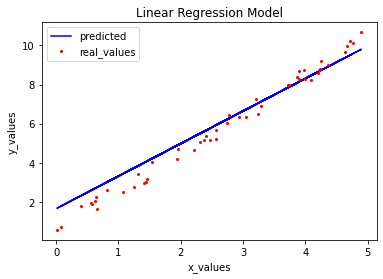

In [44]:
y_preds = w*x+b
plt.plot(x,y_preds,'-b',x,y,'ro',markersize = 2)
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.title('Linear Regression Model')
plt.legend(['predicted','real_values'])
plt.show()

### (d) Linear Regression on Max-Min Temperature Data

Firs of all, lets convert our gradient decent and plotting codes to a function. This is a very common practice in any coding project. First, make sure the code is working, then deploy it as a function, class etc. At this stage, we are just interested in end results. Also let's check the error curve as well. 

In [47]:
def FitLinearRegression(x,y,num_epochs = 100,lr = 0.01,print_int = 10):
    '''x: inputs(numpy) array
       y: real-values(numpy)
    '''
    N = float(len(x))
    w = 0.
    b = 0.
    error = np.array([])
    for epoch in range(num_epochs):
        y_pred = w * x + b                    # predictions
        w_der = (1/N)*np.sum(2*(y_pred-y)*x)  # gradient of w
        b_der = (1/N)*np.sum(2*(y_pred-y))    # gradient of b
        w = w - lr * w_der                    # gradient decent for w
        b = w - lr * b_der                    # gradient decent for b
#         if epoch%print_int == 0:
#             PlotResults(x,y,w,b)             # plot the results during "learning" process
        error = np.append(error,[1/N * np.sum((y_pred - y)**2)])  # Mean Square Error(MSE) in each epoch
        #print(f'epoch: {epoch} err: {MSE:0.10f}')
    return w, b, error
#w, b = FitLinearRegression(x,y,num_epochs = 100,lr = 0.01)
#w, b, error = FitLinearRegression(x,y,num_epochs = 20,lr = 0.01)

In [68]:
def PlotResults(x,y,w,b):
    """ x: real input(array), y: real output(array)
        w: weight, b: bias
    """
    y_preds = w*x+b
    plt.plot(x,y_preds,'-b',x,y,'ro',markersize = 1)
    plt.xlabel('x_values')
    plt.ylabel('y_values')
    plt.title('Linear Regression Model')
    plt.legend(['predicted','real_values'])
    plt.show()

In [50]:
def PlotError(error, num_epochs):
    epoch = np.linspace(1,num_epochs,num_epochs)
    plt.plot(epoch,error,'-b')
    plt.xlabel('epoch')
    plt.ylabel('MSE Error')
    plt.title('Error Curve')
    plt.show()

w:1.662434 b:1.657586


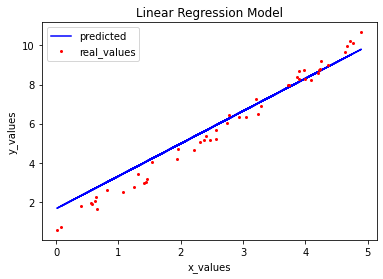

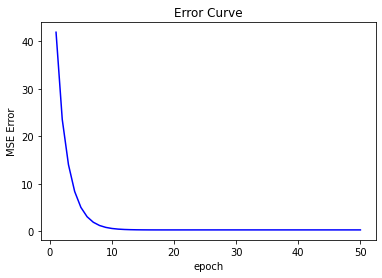

In [54]:
num_epochs = 50
lr = 0.01
w, b, error = FitLinearRegression(x,y,num_epochs,lr)
print(f'w:{w:0.6f} b:{b:0.6f}')
PlotResults(x,y,w,b)
PlotError(error, num_epochs)

As we can see from MSE curve, the error does not change significantly after 20 epochs. Thus, training the model with 50 epochs is not an optimal choice. The better idea would identify the optimal epoch number and run the model only for 20 epochs. In many modern machine libraries have a functionality to detect the slowdown in the error cuve so that we can stop the training early. This is called **"early stopping"**.

Now let's work on a real data-set. This dataset concerns the minimum and maximum temprature recorded in a couple of years period. The data format is "*csv" (comma seperated version). We would like to train a linear regression model to fit this dataset. We would like to predict the max temprature from minimum temprature.

In [57]:
df = pd.read_csv('datasets/MaxMinTemp.csv')
df.head()

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667


In [58]:
df.describe()

,MinTemp,MaxTemp
count,119040.000000,119040.000000
mean,17.789511,27.045111
std,8.334572,8.717817
min,-38.333333,-33.333333
25%,15.000000,25.555556
50%,21.111111,29.444444
75%,23.333333,31.666667
max,34.444444,50.000000


In reality, we should **NOT** train the model on the entire dataset. So, we will split the data into training and testing parts. Idea is to train the model on training data set then test the quality of the model on the testing data set. Usually, we split the data as 80% training and 20% testing. Train-test split is a **MUST** process in supervised machine learning.

In [59]:
train_set = df.sample(frac = 0.8)     # training dataset
test_set  = df.drop(train_set.index)  # testing dataset

In [60]:
print(len(train_set))
print(len(test_set))

95232
23808


In [63]:
x_train = train_set['MinTemp']
y_train = train_set['MaxTemp']
x_test = test_set['MinTemp']
y_test = test_set['MaxTemp']

In [74]:
num_epochs = 20
lr = 0.001
w, b, error = FitLinearRegression(x_train,y_train,num_epochs,lr)
print(f'w:{w:0.6f} b:{b:0.6f}')

w:1.349852 b:1.353200


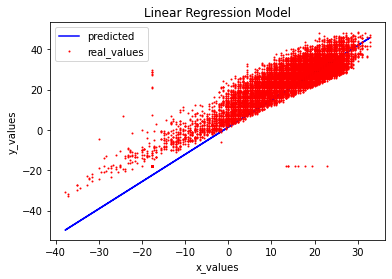

In [75]:
#carefully note that we display the test data vs predicted line
PlotResults(x_test,y_test,w,b)

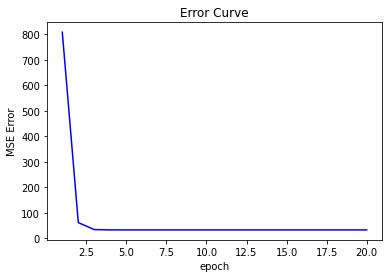

In [73]:
PlotError(error, num_epochs)